# Neural Network Try

In [2]:
import pandas as pd 

from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.cm as cm

font = {'family' : 'Times New Roman', 'weight' : 'normal', 'size'   : 20}
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rc('font', **font)

In [3]:
forging_temp_features=pd.read_csv('forging_temp_features.csv',index_col=0)
forging_force_features=pd.read_csv('forging_force_features.csv',index_col=0)
heating_transfer_temp_features=pd.read_csv('heating_transfer_temp_features.csv',index_col=0)

In [4]:
features_F = set()

In [5]:
features_F.update([forging_force_features.columns[0],forging_force_features.columns[3],forging_force_features.columns[6],forging_force_features.columns[7],forging_force_features.columns[10],forging_force_features.columns[14],forging_force_features.columns[15],forging_force_features.columns[18]])

#                'Forging Phase 1 Force ROI'
new_force_features=pd.DataFrame(forging_force_features[features_F])

In [6]:
features= pd.concat([forging_temp_features, heating_transfer_temp_features, new_force_features], axis=1)
features.head()

,Forging Temperature Start [K],Forging Temperature ROI [K/s],Forging Box Temperature Mean [K],Forging Box Temperature ROI [K/s],Max Temp After Heating [°C],Transfer Time [s],Heat Loss Rate [°C/s],Last Temp from Transfer Phase [°C],Forging Phase 3 Force ROI [kN/s],Forging Phase 4 Force ROD [kN/s],Forging Phase 2 Force ROI [kN/s],Forging Phase 4 Force ROI [kN/s],Forging Phase 5 Force ROI [kN/s],Forging Time [s],Forging Phase 2 Force ROD [kN/s],Forging Phase 1 Force ROD [kN/s]
1,602.732083,1.618284,36.192435,0.001645,828.320314,35.90,-7.572806,750.823770,730.436198,25.724617,544.263518,104.366035,166.787860,57.19,86.589598,250.613387
2,606.262317,1.906290,36.571765,0.002713,828.397446,36.20,-7.584098,745.359682,749.328684,22.123170,399.048828,96.175185,152.593149,57.19,96.483482,245.475124
3,609.255466,1.838307,36.930623,0.001947,828.326191,36.38,-7.571350,755.186879,889.034032,20.890330,494.879262,92.637663,141.801678,57.38,92.141278,225.635367
4,609.371109,1.838493,37.268789,0.001906,828.336038,36.46,-7.549796,754.832424,710.950878,22.517206,597.476182,91.905213,146.608514,56.89,89.047057,238.546051
5,609.832020,1.815287,37.543507,0.001587,828.320620,36.41,-7.490242,755.893418,798.936435,21.016059,530.527344,95.725586,144.213498,57.37,89.573525,246.289692


### Importing the target matrix...

In [7]:
target=pd.read_excel(Path('Data')/'AFRC Radial Forge - Zenodoo Upload v3'/'Data'/'CMMData.xlsx', index_col=3)
target=target.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
#target.index

nominal_val=pd.DataFrame(target.iloc[0:3,:])
target=target.iloc[3:,:]
#Path('Data')/'AFRC Radial Forge - Zenodoo Upload v3'/'Data'/file_format

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

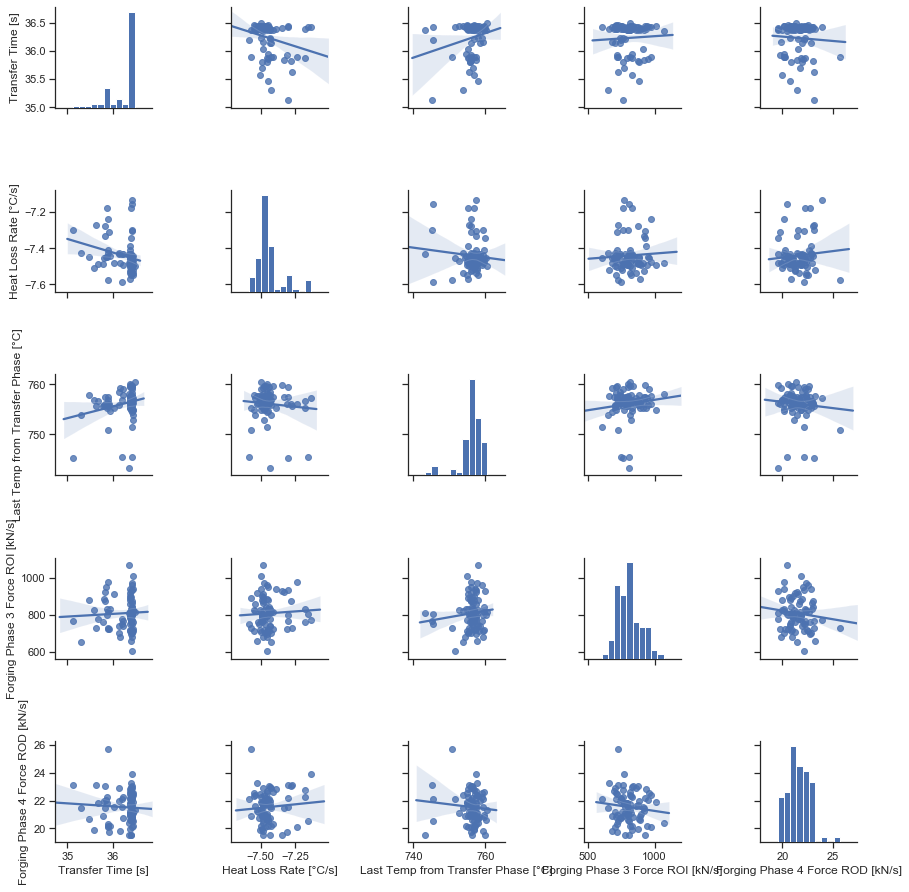

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.pairplot(features.iloc[:,5:10], kind="reg")

In [79]:
X=features.values
y=target['38 dia @200']

In [95]:
def norm(y):
  return (1.0/(max(y)-min(y)))*(y-min(y))
y_scale = norm(y)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(features, y_scale_y, test_size=0.25)
X_train.shape, X_test.shape

((60, 16), (21, 16))

In [97]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Forging Temperature Start [K],60.0,611.656907,3.096944,602.199599,610.063837,611.974156,613.723452,618.579881
Forging Temperature ROI [K/s],60.0,1.824332,0.055563,1.618284,1.806045,1.826433,1.857893,1.924407
Forging Box Temperature Mean [K],60.0,41.504582,1.861437,36.192435,40.998780,42.340268,42.855006,43.079312
Forging Box Temperature ROI [K/s],60.0,0.000564,0.000587,-0.000102,0.000180,0.000415,0.000739,0.002713
Max Temp After Heating [°C],60.0,830.798078,3.822952,824.271753,828.433864,829.520237,831.698925,843.989525
Transfer Time [s],60.0,36.174167,0.330779,35.120000,35.900000,36.380000,36.422500,36.490000
Heat Loss Rate [°C/s],60.0,-7.442188,0.089423,-7.584098,-7.491177,-7.458121,-7.430032,-7.176777
Last Temp from Transfer Phase [°C],60.0,756.018233,3.186920,743.323424,755.241318,756.559659,757.512980,760.558365
Forging Phase 2 Force ROI [kN/s],60.0,500.260885,81.885878,377.550938,446.922754,490.302274,555.578232,860.047432
Forging Phase 1 Force ROD [kN/s],60.0,233.694791,20.689096,169.223544,220.209547,234.081241,245.054665,291.083165


In [98]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_train_scale = norm(X_train)
X_test_scale = norm(X_test)

In [11]:
#   X_train_scale       y_train
#   X_test_scale        y_test

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [101]:
model = Sequential()
model.add(Dense(12, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [103]:
history = model.fit(normed_train_data, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 48 samples, validate on 12 samples
Epoch 1/150
48/48 [==============================] - 1s 15ms/step - loss: 19.9673 - mean_squared_error: 19.9673 - mean_absolute_error: 3.8351 - val_loss: 15.6083 - val_mean_squared_error: 15.6083 - val_mean_absolute_error: 3.3252
Epoch 2/150
48/48 [==============================] - 0s 62us/step - loss: 19.4152 - mean_squared_error: 19.4152 - mean_absolute_error: 3.7807 - val_loss: 15.2426 - val_mean_squared_error: 15.2426 - val_mean_absolute_error: 3.2808
Epoch 3/150
48/48 [==============================] - 0s 62us/step - loss: 18.8829 - mean_squared_error: 18.8829 - mean_absolute_error: 3.7272 - val_loss: 14.8918 - val_mean_squared_error: 14.8918 - val_mean_absolute_error: 3.2375
Epoch 4/150
48/48 [==============================] - 0s 62us/step - loss: 18.3664 - mean_squared_error: 18.3664 - mean_absolute_error: 3.6743 - val_loss: 14.5475 - val_mean_squared_error: 14.5475 - val_mean_absolute_error: 3.1945
Epoch 5/150
48/48 [=================

Epoch 37/150
48/48 [==============================] - 0s 42us/step - loss: 6.6891 - mean_squared_error: 6.6891 - mean_absolute_error: 2.1646 - val_loss: 6.3257 - val_mean_squared_error: 6.3257 - val_mean_absolute_error: 2.0365
Epoch 38/150
48/48 [==============================] - 0s 62us/step - loss: 6.4785 - mean_squared_error: 6.4785 - mean_absolute_error: 2.1285 - val_loss: 6.1672 - val_mean_squared_error: 6.1672 - val_mean_absolute_error: 2.0113
Epoch 39/150
48/48 [==============================] - 0s 62us/step - loss: 6.2746 - mean_squared_error: 6.2746 - mean_absolute_error: 2.0928 - val_loss: 6.0133 - val_mean_squared_error: 6.0133 - val_mean_absolute_error: 1.9864
Epoch 40/150
48/48 [==============================] - 0s 42us/step - loss: 6.0771 - mean_squared_error: 6.0771 - mean_absolute_error: 2.0575 - val_loss: 5.8638 - val_mean_squared_error: 5.8638 - val_mean_absolute_error: 1.9619
Epoch 41/150
48/48 [==============================] - 0s 42us/step - loss: 5.8861 - mean_squ

Epoch 110/150
48/48 [==============================] - 0s 104us/step - loss: 1.0280 - mean_squared_error: 1.0280 - mean_absolute_error: 0.8179 - val_loss: 1.8467 - val_mean_squared_error: 1.8467 - val_mean_absolute_error: 1.0625
Epoch 111/150
48/48 [==============================] - 0s 62us/step - loss: 1.0117 - mean_squared_error: 1.0117 - mean_absolute_error: 0.8127 - val_loss: 1.8297 - val_mean_squared_error: 1.8297 - val_mean_absolute_error: 1.0557
Epoch 112/150
48/48 [==============================] - 0s 83us/step - loss: 0.9959 - mean_squared_error: 0.9959 - mean_absolute_error: 0.8075 - val_loss: 1.8130 - val_mean_squared_error: 1.8130 - val_mean_absolute_error: 1.0503
Epoch 113/150
48/48 [==============================] - 0s 83us/step - loss: 0.9808 - mean_squared_error: 0.9808 - mean_absolute_error: 0.8025 - val_loss: 1.7968 - val_mean_squared_error: 1.7968 - val_mean_absolute_error: 1.0451
Epoch 114/150
48/48 [==============================] - 0s 83us/step - loss: 0.9659 - me

Epoch 146/150
48/48 [==============================] - 0s 42us/step - loss: 0.6446 - mean_squared_error: 0.6446 - mean_absolute_error: 0.6692 - val_loss: 1.4070 - val_mean_squared_error: 1.4070 - val_mean_absolute_error: 0.9085
Epoch 147/150
48/48 [==============================] - 0s 42us/step - loss: 0.6377 - mean_squared_error: 0.6377 - mean_absolute_error: 0.6661 - val_loss: 1.3992 - val_mean_squared_error: 1.3992 - val_mean_absolute_error: 0.9053
Epoch 148/150
48/48 [==============================] - 0s 104us/step - loss: 0.6310 - mean_squared_error: 0.6310 - mean_absolute_error: 0.6630 - val_loss: 1.3916 - val_mean_squared_error: 1.3916 - val_mean_absolute_error: 0.9022
Epoch 149/150
48/48 [==============================] - 0s 42us/step - loss: 0.6243 - mean_squared_error: 0.6243 - mean_absolute_error: 0.6599 - val_loss: 1.3842 - val_mean_squared_error: 1.3842 - val_mean_absolute_error: 0.8991
Epoch 150/150
48/48 [==============================] - 0s 42us/step - loss: 0.6177 - me

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


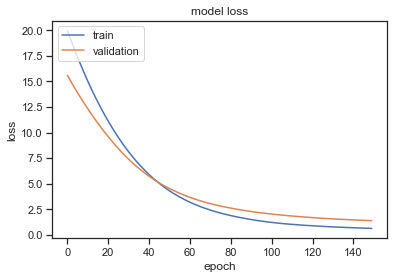

In [104]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1]:
ynew= model.predict(normed_test_data)

print("X=%s, Predicted=%s" % (y_test, ynew))
print(ynew)

NameError: name 'model' is not defined

# -----------------------------------------------------------------------
# XGBoost


In [13]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [14]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [159]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

xgb_model = xgb.XGBRegressor(objective="reg:linear", 
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

[14:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
61.8237254052877


In [160]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.2574306275949395

In [118]:
clf = RandomForestRegressor(n_estimators=17)
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=17,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, clf.predict(X_test))

0.36201794043119195

(8.934823399558496, 362.0651766004415)

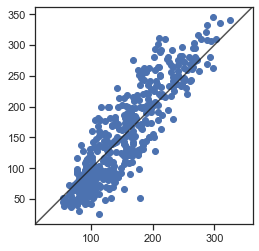

In [40]:
f=plt.figure()
ax=f.add_subplot(111)
ax.scatter(y_pred, y)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)